In [1]:
# File with the reviews database
file = '/Users/gkhanna/Downloads/reviews_Home_and_Kitchen_5.json'

In [2]:
import sys

In [3]:
import numpy as np
import os
import pandas as pd
import re

In [4]:
sys.path

['',
 '/Users/gkhanna/Google Drive/210Capstone/code/InsightsFromReviews/app/ai',
 '/Users/gkhanna/anaconda3/lib/python37.zip',
 '/Users/gkhanna/anaconda3/lib/python3.7',
 '/Users/gkhanna/anaconda3/lib/python3.7/lib-dynload',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/gkhanna/.ipython']

In [5]:
!pip3 show tensorflow

Name: tensorflow
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/gkhanna/anaconda3/lib/python3.7/site-packages
Requires: gast, grpcio, six, tensorflow-estimator, absl-py, astor, wrapt, protobuf, termcolor, keras-applications, tensorboard, numpy, google-pasta, wheel, keras-preprocessing
Required-by: 


In [6]:
path = '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages'
sys.path.append(path)

In [7]:
sys.path

['',
 '/Users/gkhanna/Google Drive/210Capstone/code/InsightsFromReviews/app/ai',
 '/Users/gkhanna/anaconda3/lib/python37.zip',
 '/Users/gkhanna/anaconda3/lib/python3.7',
 '/Users/gkhanna/anaconda3/lib/python3.7/lib-dynload',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/gkhanna/.ipython',
 '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages']

In [8]:
from insights import features

/Users/gkhanna/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: spacy.tokens.span.Span size changed, may indicate binary incompatibility. Expected 72 from C header, got 80 from PyObject
  return f(*args, **kwds)
/Users/gkhanna/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
from insights import languageUtils

In [10]:
from insights import summary

In [11]:

# ASIN corresponding to the Iron Skillet
pl = 'B00006JSUA'
# pl = 'B000QFDNP8'

In [12]:
# Load reviews into a dictionary
file_d = features.loadFromDb(file, count = 3000, filter_l = pl)

551682it [00:03, 140801.90it/s]

1064 Reviews written to the dictionary 


In [13]:
print(len(file_d))

1064


In [14]:
file_d[0]

{'reviewerID': 'A117FYENI6RSPP',
 'asin': 'B00006JSUA',
 'reviewerName': '5150hillbilly',
 'helpful': [0, 0],
 'reviewText': 'Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.',
 'overall': 5.0,
 'summary': 'Old school',
 'unixReviewTime': 1355184000,
 'reviewTime': '12 11, 2012'}

In [15]:
reviews_sent, reviews_pos_sent, reviews_neg_sent, sum_sent, sum_pos_sent, sum_neg_sent = summary.loadTolistsAndClassify(file_d, pl, 0)

100%|██████████| 1064/1064 [00:00<00:00, 9334.32it/s]

Processed and Classified 1064 Reviews
1022 Positive reviews
42 Negative reviews


In [16]:
num_samples = len(sum_sent)

In [17]:
sum_neg_sent[1]

'_start_ found cheaper at walmart _end_'

In [18]:
reviews_neg_sent[3]

'i own over a dozen lodge cast item pieces that i have happily used for many years and recently purchased this one to add to my collection  immediately  i noticed this pan seemed thinner and  cheaper  made  than in the past  on the first use before heating  i noticed the pan bottom was warped upward in the center allowing oil and food to run to the edge  after 3 4 uses  i noticed the bottom center seemed to be deteriorating  after 5 uses  i noticed what seems to be a crack forming  now it will be thrown away  i have never had a problem with lodge cast iron until now  very disappointed '

In [19]:
reviews_sent[3]

'so far i am loving this skillet  it is priced well and you can tell it is good quality  i have used it to make a skillet cookie  asparagus  and saute shrimp  not all at the same time    it performed very well   and i am looking forward to getting much more use out of it '

In [20]:
sum_sent[3]

'_start_ great skillet  _end_'

### Word counts in reviews and summaries
We'll get another validation of this after tokenization

In [21]:
import matplotlib.pyplot as plt

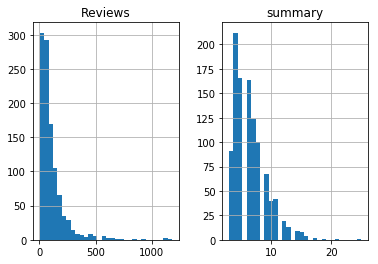

In [22]:
reviews_word_count = []
sum_word_count = []

for i in reviews_sent:
      reviews_word_count.append(len(i.split()))

for i in sum_sent:
      sum_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Reviews':reviews_word_count, 'summary':sum_word_count})
length_df.hist(bins = 30)
plt.show()

In [23]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
/Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gkhanna/anaconda3/lib/python3.7/site-packag

## Tokenize: text_to_word_sequence

In [24]:
# VOCAB_SIZE = 800
# tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

In [25]:
# We've already cleaned up the data
# Though we could use this for cleaning also
reviews_tokenizer = Tokenizer()

In [26]:
r_tokenizer = Tokenizer()
r_tokenizer.fit_on_texts(reviews_sent)
reviews_sequences = r_tokenizer.texts_to_sequences(reviews_sent)
reviews_word_index = r_tokenizer.word_index
len(reviews_word_index)

5820

In [27]:
s_tokenizer = Tokenizer()
s_tokenizer.fit_on_texts(sum_sent)
summary_sequences = s_tokenizer.texts_to_sequences(sum_sent)
sum_word_index = s_tokenizer.word_index
len(sum_word_index)

864

In [28]:
import statistics

In [29]:
reviews_vocab_size = len(reviews_word_index) + 1
reviews_vocab_size

5821

In [30]:
sum_vocab_size = len(sum_word_index) + 1
sum_vocab_size

865

### Max len of the sequences

In [31]:
max_reviews_seq_len = max([len(seq) for seq in reviews_sequences])
max_reviews_seq_len

1182

In [32]:
med_reviews_seq_len = statistics.mode([len(seq) for seq in reviews_sequences])
med_reviews_seq_len

27

In [33]:
max_summary_seq_len = max([len(seq) for seq in summary_sequences])
max_summary_seq_len

25

In [34]:
med_summary_seq_len = statistics.mean([len(seq) for seq in summary_sequences])
med_summary_seq_len

6.4605263157894735

### Vocabulary size

In [35]:
# VOCAB_SIZE = len(reviews_word_index) - 10
# VOCAB_SIZE

In [36]:
# reviews_word_index_vsize = {}
# counter = 0
# for word in reviews_word_index.keys():
#     if reviews_word_index[word] == 0:
#         print("found 0!")
#         break
#     if reviews_word_index[word] > VOCAB_SIZE:
#         continue
#     else:
#         reviews_word_index_vsize[word] = reviews_word_index[word]
#         counter += 1

In [37]:
# len(reviews_word_index_vsize)

In [38]:
# sum_word_index_vsize = {}
# counter = 0
# for word in sum_word_index.keys():
#     if sum_word_index[word] == 0:
#         print("found 0!")
#         break
#     if sum_word_index[word] > VOCAB_SIZE:
#         continue
#     else:
#         sum_word_index_vsize[word] = sum_word_index[word]
#         counter += 1

In [39]:
# len(sum_word_index_vsize)

### Padding

In [40]:
from keras.preprocessing.sequence import pad_sequences
# MAX_LEN = max_reviews_seq_len
pad_reviews_sequences = pad_sequences(reviews_sequences, maxlen=max_reviews_seq_len, padding='post', truncating='post')

In [41]:
print(len(reviews_sequences[0]), len(pad_reviews_sequences[0]))

49 1182


In [42]:
print(pad_reviews_sequences)

[[ 33 212  84 ...   0   0   0]
 [  8   7  68 ...   0   0   0]
 [  2  20 204 ...   0   0   0]
 ...
 [  8   7   5 ...   0   0   0]
 [  2  20   5 ...   0   0   0]
 [  2  23   8 ...   0   0   0]]


In [43]:
pad_reviews_sequences.shape

(1064, 1182)

In [44]:
pad_sum_sequences = pad_sequences(summary_sequences, maxlen=max_summary_seq_len, padding='post', truncating='post')

In [45]:
print(len(summary_sequences[0]), len(pad_sum_sequences[0]))

4 25


In [46]:
pad_sum_sequences.shape

(1064, 25)

### Reshape

In [47]:
encoder_inputs = np.zeros((num_samples, max_reviews_seq_len), dtype='float32')
encoder_inputs.shape

for i, seqs in enumerate(pad_reviews_sequences):
    for j, seq in enumerate(seqs):
        encoder_inputs[i, j] = seq
        

In [48]:
encoder_inputs.shape

(1064, 1182)

In [49]:

decoder_inputs = np.zeros((num_samples, max_summary_seq_len), dtype='float32')
decoder_inputs.shape
        
for i, seqs in enumerate(pad_sum_sequences):
    for j, seq in enumerate(seqs):
        decoder_inputs[i, j] = seq

In [50]:
decoder_inputs.shape

(1064, 25)

In [51]:
decoder_outputs = np.zeros((num_samples, max_summary_seq_len, sum_vocab_size), dtype='float32')
decoder_outputs.shape

(1064, 25, 865)

In [52]:
for i, seqs in enumerate(pad_sum_sequences):
    for j, seq in enumerate(seqs):
        if j > 0:
            decoder_outputs[i, j-1, seq] = 1.

In [53]:
decoder_outputs.shape

(1064, 25, 865)

## Glove embeddings

In [54]:
embeddings_index = {}
with open('/Users/gkhanna/Downloads/glove.6B/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [55]:
embeddings_index['start'].shape

(100,)

In [56]:
def embedding_matrix_creater(embedding_dimension, word_index):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dimension))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [57]:
# Hyperparams


EMBEDDING_DIM = 100


In [58]:
reviews_embedding_matrix = embedding_matrix_creater(EMBEDDING_DIM, word_index=reviews_word_index)
reviews_embedding_matrix.shape

(5821, 100)

In [59]:
len(reviews_embedding_matrix)

5821

In [60]:
sum_embedding_matrix = embedding_matrix_creater(EMBEDDING_DIM, word_index=sum_word_index)
sum_embedding_matrix.shape

(865, 100)

In [61]:
from numpy.random import seed
seed(1)

In [62]:
import logging

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
import keras
from keras import backend as k
k.clear_session()
k.set_learning_phase(1)

W0803 15:04:38.425108 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0803 15:04:38.426445 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0803 15:04:38.444281 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [65]:
from keras.preprocessing.text import Tokenizer
from keras import initializers
from keras.optimizers import RMSprop
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM,Dropout,Input,Activation,Add,concatenate, Embedding, RepeatVector
from keras.layers.advanced_activations import LeakyReLU,PReLU
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam


In [66]:
from keras.layers import TimeDistributed, Concatenate

In [67]:
from insights.attention import AttentionLayer

### Hyperparams

In [68]:
# Hyperparams

# MAX_LEN = 1000
# VOCAB_SIZE = len(sum_embedding_matrix)
# EMBEDDING_DIM = 200
HIDDEN_UNITS = 100
# VOCAB_SIZE = VOCAB_SIZE + 1

LEARNING_RATE = 0.0005
BATCH_SIZE = 5
EPOCHS = 20

### Embedding Layer

In [69]:
# encoder_embedding_layer = Embedding(input_dim = reviews_vocab_size, 
#                                     output_dim = EMBEDDING_DIM,
#                                     input_length = max_reviews_seq_len,
#                                     weights = [reviews_embedding_matrix],
#                                     trainable = False)

# decoder_embedding_layer = Embedding(input_dim = sum_vocab_size, 
#                                     output_dim = EMBEDDING_DIM,
#                                     input_length = max_summary_seq_len,
#                                     weights = [sum_embedding_matrix],
#                                     trainable = False)

In [70]:
encoder_embedding_layer = Embedding(input_dim = reviews_vocab_size, 
                                    output_dim = EMBEDDING_DIM,
                                    weights = [reviews_embedding_matrix],
                                    trainable = True)

decoder_embedding_layer = Embedding(input_dim = sum_vocab_size, 
                                    output_dim = EMBEDDING_DIM,
                                    weights = [sum_embedding_matrix],
                                    trainable = True)

In [71]:
sum_vocab_size

865

## Model

### LSTM

In [72]:
## # encoder
encoder_inputs = Input(shape=(max_reviews_seq_len, ), dtype = 'int32',)
encoder_embedding = encoder_embedding_layer(encoder_inputs)

# LSTM 1
encoder_LSTM1 = LSTM(HIDDEN_UNITS, return_sequences = True, return_state = True)
encoder_output1, state_h1, state_c1 = encoder_LSTM1(encoder_embedding)

# LSTM 2
encoder_LSTM2 = LSTM(HIDDEN_UNITS, return_sequences = True, return_state = True)
encoder_outputs, state_h, state_c = encoder_LSTM2(encoder_output1)


encoder_states = [state_h, state_c]

# decoder
# decoder_inputs = Input(shape=(max_summary_seq_len, ), dtype = 'int32')
decoder_inputs = Input(shape=(None, ), dtype = 'int32')
decoder_embedding = decoder_embedding_layer(decoder_inputs)

# Decoder LSTM with encoder_states as the initial state
decoder_LSTM = LSTM(HIDDEN_UNITS, return_sequences = True, return_state = True)
decoder_outputs, state_d_h, state_d_c = decoder_LSTM(decoder_embedding, initial_state = [state_h, state_c])

# Dense Layer
decoder_dense = TimeDistributed(Dense(units=sum_vocab_size, activation="softmax"))
decoder_outputs = decoder_dense(decoder_outputs) # SUM_VOCAB_SIZE, sum_embedding_matrix.shape[1]

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()


W0803 15:04:38.505594 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 15:04:38.508742 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1182)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1182, 100)    582100      input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 1182, 100),  80400       embedding_1[0][0]                
__________________________________________________________________________________________________
embedding_

In [73]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

W0803 15:04:39.237138 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## TRAINING

In [74]:
# history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

In [75]:
num_samples = len(pad_sum_sequences)
decoder_output_data = np.zeros((num_samples, max_summary_seq_len, sum_vocab_size), dtype="int32")


In [76]:
pad_sum_sequences.shape

(1064, 25)

In [77]:
pad_reviews_sequences.shape

(1064, 1182)

In [78]:
decoder_output_data.shape

(1064, 25, 865)

In [79]:
# Output
for i, seqs in enumerate(pad_sum_sequences):
    for j, seq in enumerate(seqs):
        if j > 0:
            decoder_output_data[i][j - 1][seq] = 1

In [80]:
reviews_train, reviews_test, sum_train, sum_test = train_test_split(pad_reviews_sequences, pad_sum_sequences, test_size=0.2, shuffle = False)

In [81]:
train_num = reviews_train.shape[0]
train_num

851

In [82]:
reviews_train.shape

(851, 1182)

In [83]:
reviews_test[5]

array([ 8, 19,  7, ...,  0,  0,  0], dtype=int32)

In [84]:
reviews_test.shape

(213, 1182)

In [85]:
sum_train.shape

(851, 25)

In [86]:
sum_train[5]

array([  1,  43,  19,  43,  28,  58, 263,  90, 100,  35, 211, 212,   2,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=int32)

In [87]:
sum_test.shape

(213, 25)

In [88]:
target_train = decoder_output_data[:train_num]
target_test = decoder_output_data[train_num:]

In [89]:
target_train.shape

(851, 25, 865)

In [90]:
target_test.shape

(213, 25, 865)

In [91]:
target_train.shape

(851, 25, 865)

In [92]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [93]:
history = model.fit([reviews_train, sum_train], 
                     target_train, 
                     epochs=EPOCHS,
                     callbacks = [es],
                     batch_size=BATCH_SIZE,
                     validation_data=([reviews_test, sum_test], target_test))

W0803 15:04:39.584998 140736209961856 deprecation.py:323] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 851 samples, validate on 213 samples
Epoch 1/20
851/851 [==============================] - 286s 336ms/step - loss: 1.4593 - acc: 0.7993 - val_loss: 1.0360 - val_acc: 0.8347
Epoch 2/20
851/851 [==============================] - 277s 325ms/step - loss: 1.0490 - acc: 0.8270 - val_loss: 1.0064 - val_acc: 0.8402
Epoch 3/20
851/851 [==============================] - 284s 334ms/step - loss: 0.9962 - acc: 0.8320 - val_loss: 0.9852 - val_acc: 0.8423
Epoch 4/20
851/851 [==============================] - 284s 334ms/step - loss: 0.9596 - acc: 0.8358 - val_loss: 0.9697 - val_acc: 0.8439
Epoch 5/20
851/851 [==============================] - 279s 327ms/step - loss: 0.9335 - acc: 0.8373 - val_loss: 0.9711 - val_acc: 0.8441
Epoch 00005: early stopping


In [94]:
# history = model.fit([reviews_train, sum_train], 
#                      target_train, 
#                      epochs=EPOCHS,
#                      batch_size=BATCH_SIZE,
#                      validation_data=([reviews_test, sum_test], target_test))

In [95]:
decoder_outputs.shape

TensorShape([Dimension(None), Dimension(None), Dimension(865)])

In [96]:
decoder_inputs.shape

TensorShape([Dimension(None), Dimension(None)])

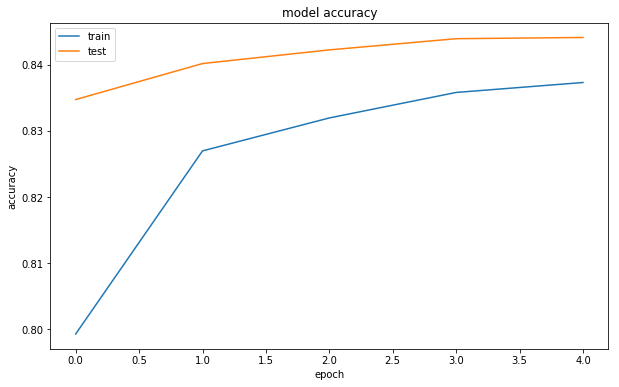

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

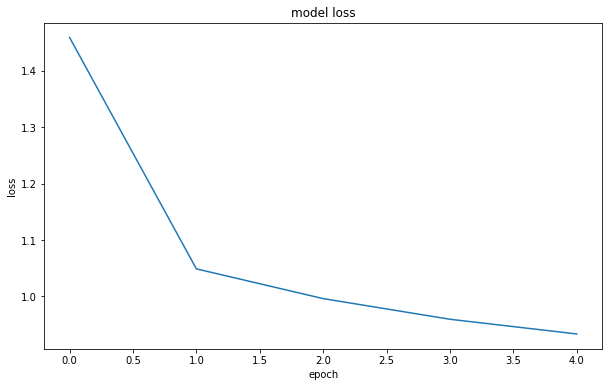

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Reverse Tokenize

In [99]:
reverse_source_word_index=r_tokenizer.index_word 
reverse_target_word_index=s_tokenizer.index_word 
target_word_index = s_tokenizer.word_index

In [100]:
len(reverse_source_word_index)

5820

### inference encoder and decoder

In [101]:
# Encoder inference
inf_encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

In [102]:
# Decoder inference

# State of the previous time step
decoder_state_input_h = Input(shape=(HIDDEN_UNITS,))
decoder_state_input_c = Input(shape=(HIDDEN_UNITS,))
# decoder_hidden_state_input = Input(shape=(max_reviews_seq_len, HIDDEN_UNITS))

# Embeddings of the decoder sequence
decoder_embeddings2 = decoder_embedding_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_LSTM(decoder_embeddings2, initial_state= [decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

# decoder_outputs, state_h, state_c = decoder_LSTM(decoder_embedding,  initial_state=decoder_state_inputs)
# decoder_states = [state_h, state_c]
# decoder_outputs = decoder_dense(decoder_outputs)
# inf_decoder_model = Model([decoder_inputs] + decoder_state_inputs, [decoder_outputs] + decoder_states)

In [103]:
inf_encoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1182)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1182, 100)         582100    
_________________________________________________________________
lstm_1 (LSTM)                [(None, 1182, 100), (None 80400     
_________________________________________________________________
lstm_2 (LSTM)                [(None, 1182, 100), (None 80400     
Total params: 742,900
Trainable params: 742,900
Non-trainable params: 0
_________________________________________________________________


In [104]:
decoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 100)    86500       input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
lstm_3 (LS

## Inference process

In [105]:


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = inf_encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # target_seq = np.array([0.0 for _ in range(max_reviews_seq_len)]).reshape(1, max_reviews_seq_len)

    # Choose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']
    
#     target_seq = np.zeros((1, 1, max_summary_seq_len))
#     target_seq[0, 0, target_word_index['start']] = 1.

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_h, e_c])

        # Sample a token
        sampled_word_index = np.argmax(output_tokens[0, -1, :])
        # print(sampled_token_index)
        # sampled_token = reverse_target_word_index[sampled_token_index]
        # Want to get a default instead of a key error
        sampled_word = reverse_target_word_index.get(sampled_word_index, "NA")
        # print(sampled_token)
        
        # if(sampled_token!='end'):
        decoded_sentence += ' ' + sampled_word

        # Exit condition: either hit max length or find stop word.
        if (sampled_word == 'end' or len(decoded_sentence.split()) > (max_summary_seq_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_word_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [106]:
# Integer sequence to words

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2review(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [107]:
for i in range(len(reviews_test[:10])):
    print("Review:",seq2review(reviews_test[i]))
    print()
    print("Original summary:",seq2summary(sum_test[i]))
    print()
    print("Predicted summary:",decode_sequence(reviews_test[i].reshape(1, max_reviews_seq_len)))
    print("\n")

Review: lodge logic makes the best cast iron products for the best price i had a 10 34 pre seasoned skillet that worked wonderfully but now i have upgraded to a 12 34 can you say giant pancake 

Original summary: perfect 

Predicted summary:  great skillet end


Review: i did not see the lid at the time i ordered it i am not sure it was available but i was pretty thorough i think i would have seen it now i see the lid and it basically makes this a low profile dutch oven buy it once and you are set in case of foreign invasion and you have to live in the woods like red dawn excellent weapon too or you can drop it on enemies from trees and win even easier 

Original summary: if only i had a lid 

Predicted summary:  great skillet end


Review: i bought this with the idea of using it for frying an egg or two since eggs stick to my stainless pans if you have the same idea do not buy this buy a teflon coated one instead my old teflon pan was ideal for frying eggs they slide right off since e

In [108]:
seq2review(reviews_train[3])

'so far i am loving this skillet it is priced well and you can tell it is good quality i have used it to make a skillet cookie asparagus and saute shrimp not all at the same time it performed very well and i am looking forward to getting much more use out of it '

In [109]:
seq2summary(sum_train[3])

'great skillet '

In [110]:
# state = inf_encoder_model.predict(reviews_test)

In [111]:

# cardinality = 720
# n_steps = 4
# output = list()

# target_seq = np.array([0.0 for _ in range(cardinality)]).reshape(1, cardinality)

# yhat, h, c = inf_decoder_model.predict([target_seq] + state)
# # store prediction
# output.append(yhat[0,0,:])
# # update state
# state = [h, c]
    

In [112]:
# def lookup(tokenizer, vec, returnIntNotWord=True):
#     twordkey = [(k, tokenizer.word_index[k]) for k in sorted(tokenizer.word_index, key=tokenizer.word_index.get, reverse=False)]
#     oneHotVec = [] #captures the index of the ords
#     engVec = [] #this one returns the indexs and the words. Make sure returnIntNotWord is false though
#     for eachRow, notUsed in enumerate(vec):
#         for index, item in enumerate(vec[0]):
#             if vec[eachRow][index] == 1:
#                 oneHotVec.append(index)
#     for index in oneHotVec:
#         engVec.append(twordkey[index])
#     if returnIntNotWord == True:
#         return oneHotVec
#     else:
#         return engVec

In [113]:
input_seq = reviews_test[6].reshape(1, max_reviews_seq_len)
input_seq.shape

(1, 1182)

In [114]:
reviews_test[6].shape

(1182,)

In [115]:
input_seq

array([[ 2, 64, 13, ...,  0,  0,  0]], dtype=int32)

In [116]:
e_out, e_h, e_c = inf_encoder_model.predict(input_seq)

In [117]:
e_out.shape

(1, 1182, 100)

In [118]:
e_h.shape

(1, 100)

In [119]:
target_seq = np.zeros((1,1))

In [120]:
target_seq.shape

(1, 1)

In [121]:
target_seq[0, 0] = target_word_index['start']

In [122]:
target_seq[0, 0]

1.0

In [123]:
output_tokens, h, c = decoder_model.predict([target_seq] + [e_h, e_c])

In [124]:
output_tokens.shape

(1, 1, 865)

In [125]:
output_tokens

array([[[1.82485150e-03, 6.32208366e-06, 1.87031482e-03, 5.96859725e-03,
         1.40523329e-01, 6.74665673e-03, 3.27257589e-02, 4.29080054e-03,
         5.28872982e-02, 4.65232618e-02, 6.95745274e-02, 2.11057775e-02,
         3.04878526e-03, 2.73025110e-02, 3.78961638e-02, 4.41466505e-03,
         6.63848827e-03, 2.62602372e-03, 2.52206642e-02, 2.62336768e-02,
         2.68547442e-02, 2.32847389e-02, 2.11246368e-02, 1.22627765e-02,
         1.18496707e-02, 5.84753929e-03, 2.85455748e-03, 4.87152720e-03,
         6.49327412e-03, 2.59551965e-02, 1.00812959e-02, 2.02653487e-03,
         2.78699435e-02, 3.93383252e-03, 1.53916655e-03, 2.00831797e-03,
         4.05249605e-03, 1.84724592e-02, 3.84546397e-03, 1.70217629e-03,
         1.09452615e-03, 1.03596225e-03, 3.30191338e-03, 2.85339588e-03,
         1.71747692e-02, 9.85985901e-03, 1.74665253e-03, 2.24866881e-03,
         2.64452118e-03, 2.33275210e-03, 1.45757326e-03, 2.44376855e-03,
         2.23160814e-03, 1.40325446e-03, 3.29366955

In [126]:
sampled_token_index = np.argmax(output_tokens[0, -1, :])

In [127]:
sampled_token_index

4

In [128]:
out = output_tokens[0, -1, :]

In [129]:
out.shape

(865,)

In [130]:
reverse_target_word_index.get(sampled_token_index, "NA")

'great'

In [131]:
target_seq = np.zeros((1,1))
target_seq[0, 0] = sampled_token_index

In [132]:
e_h, e_c = h, c

In [133]:
output_tokens, h, c = decoder_model.predict([target_seq] + [e_h, e_c])

In [134]:
sampled_token_index = np.argmax(output_tokens[0, -1, :])
reverse_target_word_index.get(sampled_token_index, "NA")

'skillet'